# Easy

## StratScratch

#### Treadmill Buyer Profile
[Aerofit](https://platform.stratascratch.com/data-projects/treadmill-buyer-profile)

Treadmill Buyer Profile

This data project has been used as a take-home assignment in the recruitment process for the data science positions at Aerofit.

**Assignment:**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**Product Portfolio:**

    The KP281 is an entry-level treadmill that sells for $1,500;
    The KP481 is for mid-level runners and sells for $1,750;
    The KP781 treadmill is having advanced features and it sells for $2,500.

**Data Description**

The company collected data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset in aerofit_treadmill_data.csv has the following features:

    Product - product purchased: KP281, KP481, or KP781
    Age - in years
    Gender - male/female
    Education - in years
    MaritalStatus - single or partnered
    Usage - the average number of times the customer plans to use the treadmill each week
    Fitness - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape
    Income - annual income in US dollars
    Miles - the average number of miles the customer expects to walk/run each week

Practicalities

Analyze the provided data and provide insights to the best of your abilities. Include the relevant tables/graphs/visualization to explain what you have learned about the market. Make sure that the solution reflects your entire thought process including the preparation of data - it is more important how the code is structured rather than just the final result or plot.

DataSets => /content/drive/MyDrive/InterviewTraining/datasets

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

#!ls "/content/drive/MyDrive/InterviewTraining/datasets"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
aerofit_treadmill_data.csv


In [2]:
## Reading the firts line of the file
!head "datasets/aerofit_treadmill_data.csv"

head: datasets/aerofit_treadmill_data.csv: No such file or directory


##### Import Libreries and read dataframe

In [5]:
#%pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 19.0 MB/s eta 0:00:00m eta 0:00:010:01:01

[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [6]:
# Import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline
warnings.filterwarnings("ignore")

In [10]:
# Loading dataframe
df = pd.read_csv('/Users/javing77/Documentos/InterviewTraining/StratScratch/Easy/Aerofit/datasets/aerofit_treadmill_data.csv')

##### Exploration Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [12]:
df.describe()

Age   Education       Usage     Fitness         Income  \
count  180.000000  180.000000  180.000000  180.000000     180.000000   
mean    28.788889   15.572222    3.455556    3.311111   53719.577778   
std      6.943498    1.617055    1.084797    0.958869   16506.684226   
min     18.000000   12.000000    2.000000    1.000000   29562.000000   
25%     24.000000   14.000000    3.000000    3.000000   44058.750000   
50%     26.000000   16.000000    3.000000    3.000000   50596.500000   
75%     33.000000   16.000000    4.000000    4.000000   58668.000000   
max     50.000000   21.000000    7.000000    5.000000  104581.000000   

            Miles  
count  180.000000  
mean   103.194444  
std     51.863605  
min     21.000000  
25%     66.000000  
50%     94.000000  
75%    114.750000  
max    360.000000

In [13]:
# Count Object
print("\nObjects Variables")
print("Product", df['Product'].unique())
print("Gender", df['Gender'].unique())
print("MaritalStatus", df['MaritalStatus'].unique())

# Count int
print("\nNumercial Variables")
print("\nAge", df['Age'].unique())
print("\nEducation", df['Education'].unique())
print("\nUsage", df['Usage'].unique())
print("\nFitness", df['Fitness'].unique())
print("\nIncome", df['Income'].unique())
print("\nMiles", df['Miles'].unique())


Objects Variables
Product ['KP281' 'KP481' 'KP781']
Gender ['Male' 'Female']
MaritalStatus ['Single' 'Partnered']

Numercial Variables

Age [18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

Education [14 15 12 13 16 18 20 21]

Usage [3 2 4 5 6 7]

Fitness [4 3 2 1 5]

Income [ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]

Miles [112  75  66  85  47 141 103  94 113  38 188  56 132 169  64  53 106  95
 212  42 127  74 170  21 120 200 140 100  80 160 180 240 150 300 280 260
 360]


In [14]:
print("Product", df['Product'].value_counts())
print("\nGender", df['Gender'].value_counts())
print("\nMaritalStatus", df['MaritalStatus'].value_counts())

Product KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

Gender Male      104
Female     76
Name: Gender, dtype: int64

MaritalStatus Partnered    107
Single        73
Name: MaritalStatus, dtype: int64


In [15]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [16]:
# Transformin objects columns into Category Dtype
#df['Product'] = df['Product'].astype('category')
#df['Gender'] = df['Gender'].astype('category')
#df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df.dtypes

In [18]:
# Missing value detection
df.isna().sum()  # No nulls

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [19]:
df.describe(include = 'all')

Product         Age Gender   Education MaritalStatus       Usage  \
count      180  180.000000    180  180.000000           180  180.000000   
unique       3         NaN      2         NaN             2         NaN   
top      KP281         NaN   Male         NaN     Partnered         NaN   
freq        80         NaN    104         NaN           107         NaN   
mean       NaN   28.788889    NaN   15.572222           NaN    3.455556   
std        NaN    6.943498    NaN    1.617055           NaN    1.084797   
min        NaN   18.000000    NaN   12.000000           NaN    2.000000   
25%        NaN   24.000000    NaN   14.000000           NaN    3.000000   
50%        NaN   26.000000    NaN   16.000000           NaN    3.000000   
75%        NaN   33.000000    NaN   16.000000           NaN    4.000000   
max        NaN   50.000000    NaN   21.000000           NaN    7.000000   

           Fitness         Income       Miles  
count   180.000000     180.000000  180.000000  
unique         NaN            NaN         NaN  
top            NaN            NaN         NaN  
freq           NaN            NaN         NaN  
mean      3.311111   53719.577778  103.194444  
std       0.958869   16506.684226   51.863605  
min       1.000000   29562.000000   21.000000  
25%       3.000000   44058.750000   66.000000  
50%       3.000000   50596.500000   94.000000  
75%       4.000000   58668.000000  114.750000  
max       5.000000  104581.000000  360.000000



Observations:

    Los datos no tienen datos nuloos
    
    Hay 3 Productos unicos
    
    KP281 es el producto mas comprado

    El minimo y maximo de edades de da las personas son de 18 y 50, la media es de 28.79 y el 75% de las personas son <= 30.

    La mayoria de las personas tienen  <= 16 anos de educacion 

    De los 180 personas 104 corresonden a hombre y el resto a mujeres.

    La Desviacion estandar en Income y Miles son altas, probablemente correspondan a Outliers.

In [20]:
# Checking duplicate values in the dataset
df.duplicated(subset=None,keep='first').sum() # No duplicate values in the dataset

0

##### Non-Graphical Analysis


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


##### Graphical Analysis

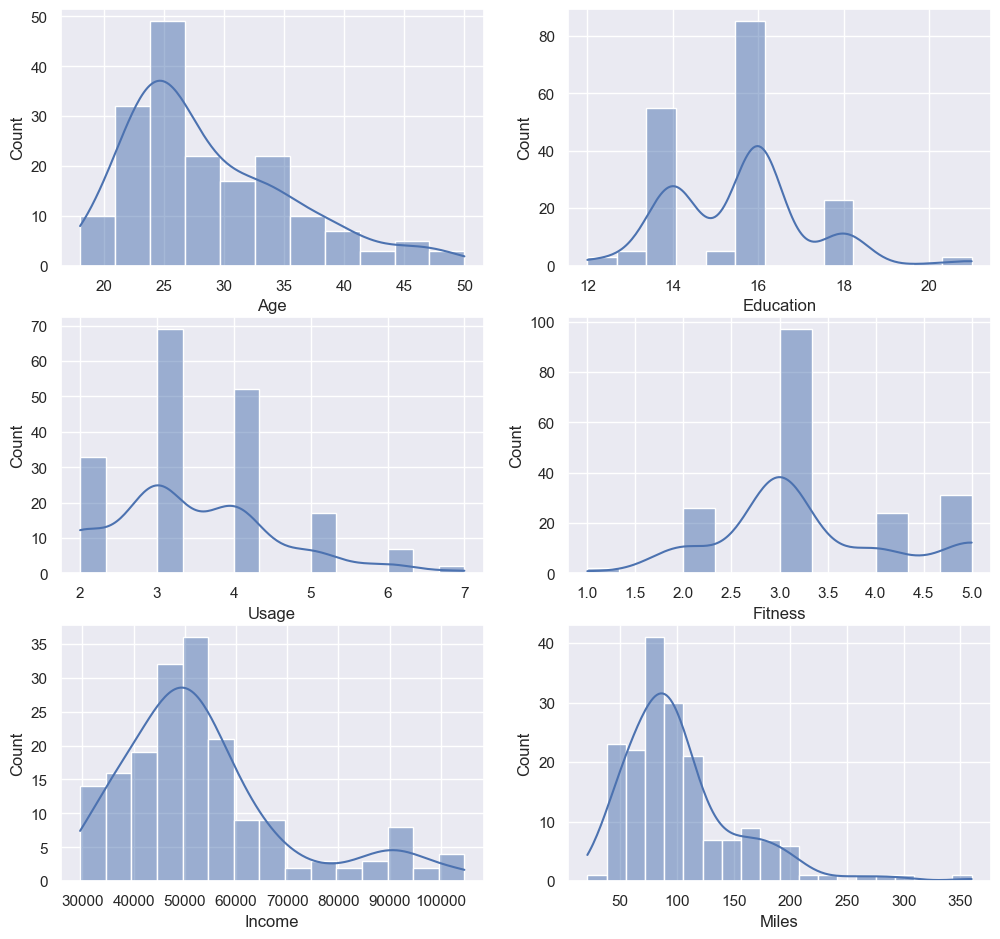

In [52]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1.2)
sns.set_palette("pastel")

# kernel density estimate
sns.histplot(df['Age'], kde=True,  ax=axis[0,0])
sns.histplot(df['Education'], kde=True, ax=axis[0,1])
sns.histplot(df['Usage'], kde=True, ax=axis[1,0])
sns.histplot(df['Fitness'], kde=True, ax=axis[1,1])
sns.histplot(df['Income'], kde=True, ax=axis[2,0])
sns.histplot(df['Miles'], kde=True, ax=axis[2,1])
plt.show()


##### Box Plot

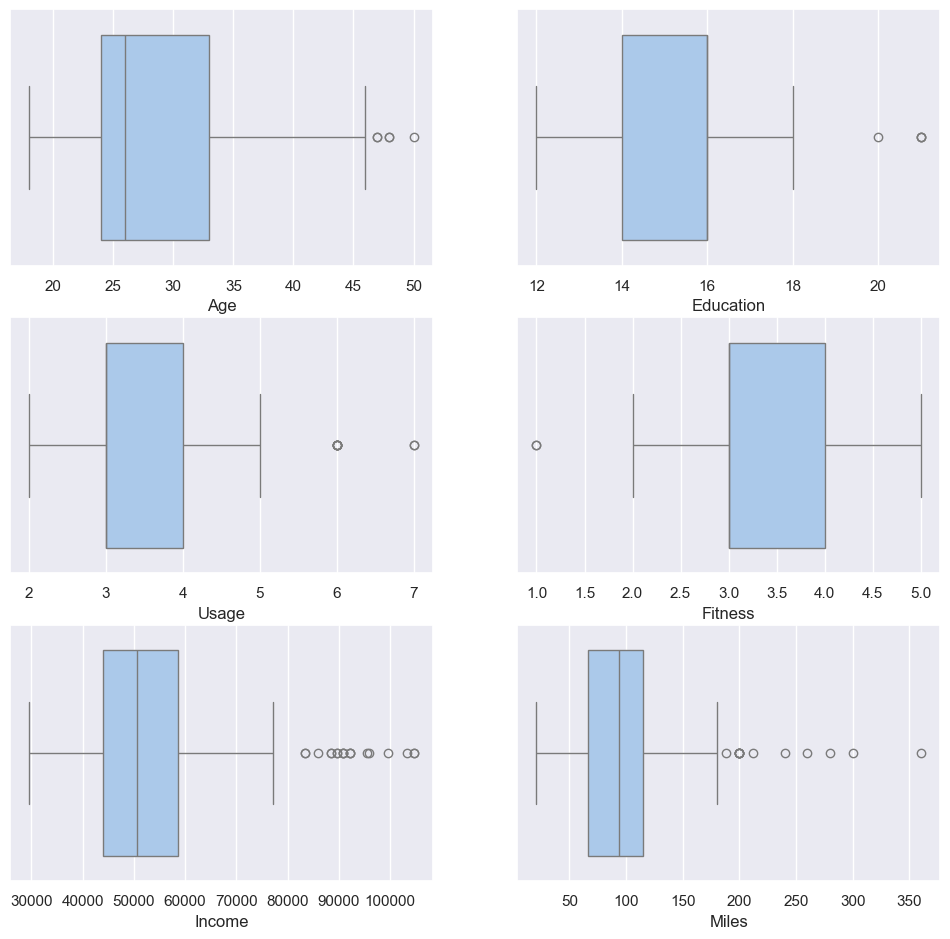

In [53]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 8))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df, x="Miles", orient='h', ax=axis[2,1])
plt.show()



Observaciones:

    En Age, Education y Usage se observa una poca cantidad de outliers.
    
    Tanto como Miles  y Income tienen una gran cantidad de Outliear, Esto segun a la distribucion 

    También las Miles y los Income tienen una "distribución sesgada hacia la derecha", lo que significa que la masa de la distribución se concentra a la izquierda de la figura.

    Customer con fitness en 3 realizan la mayor comprea de los treadmils.

    La mayoria de los Customer caen en el ragon de los $45,000 - $60.000 de income

#### Conteo plot Numerical Variables

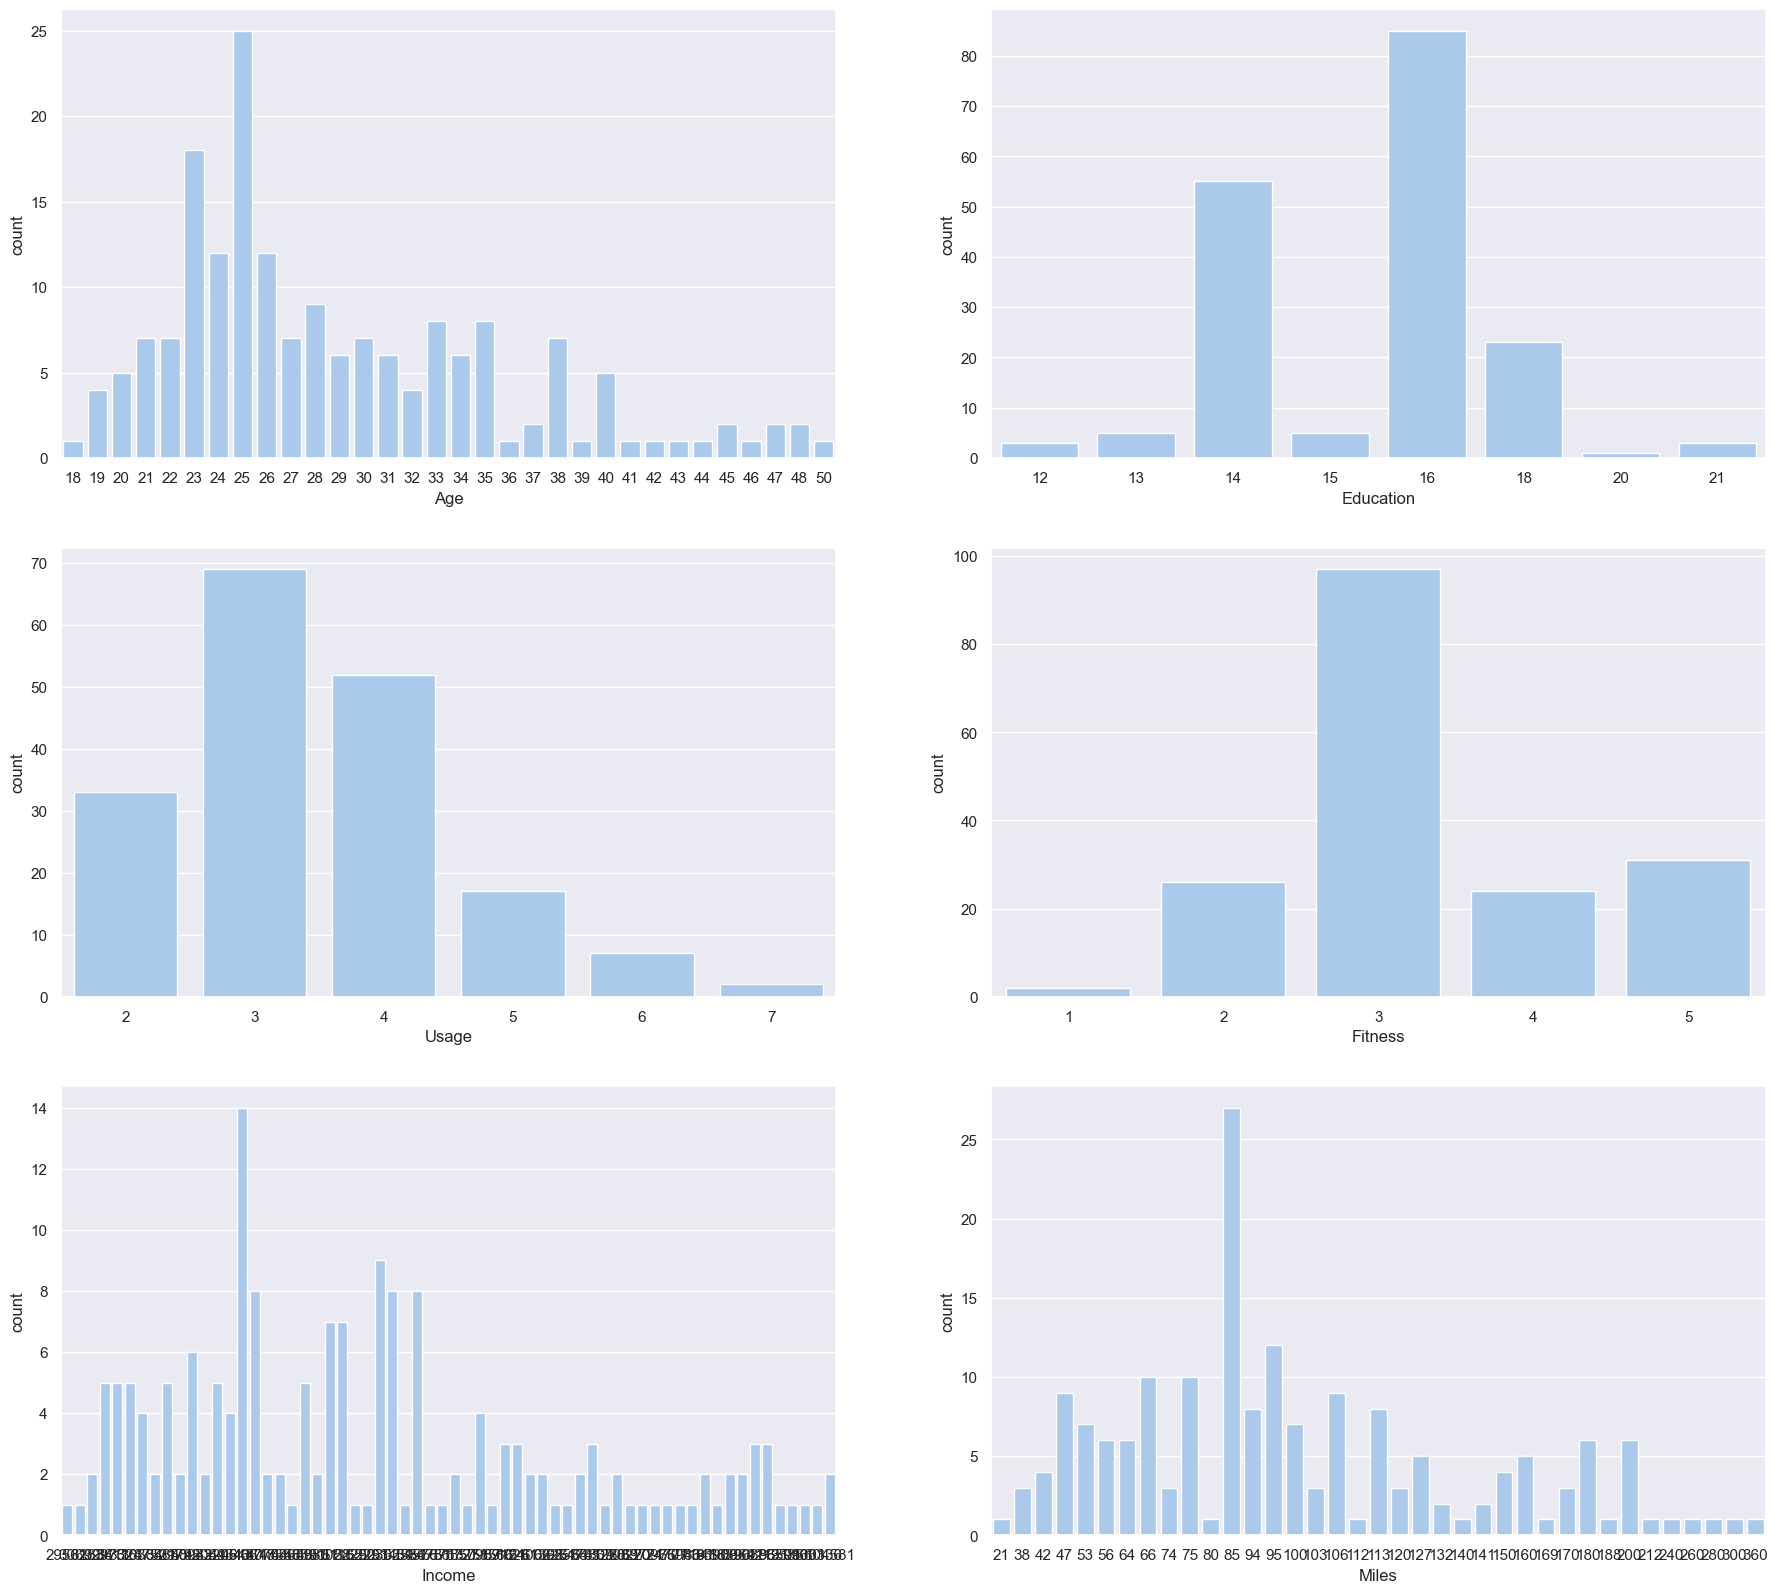

In [55]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(22, 14))
fig.subplots_adjust(top=1.2)

sns.countplot(data=df, x="Age", ax=axis[0,0])
sns.countplot(data=df, x="Education", ax=axis[0,1])
sns.countplot(data=df, x="Usage", ax=axis[1,0])
sns.countplot(data=df, x="Fitness", ax=axis[1,1])
sns.countplot(data=df, x="Income", ax=axis[2,0])
sns.countplot(data=df, x="Miles", ax=axis[2,1])
plt.show()

##### Univariate Analysis  - Categorical Variables

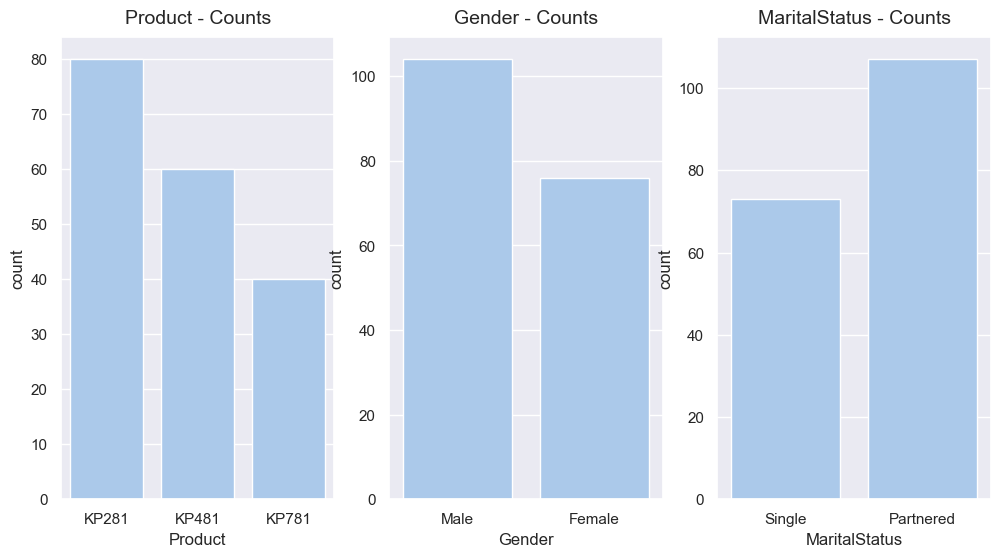

In [56]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,6))
sns.countplot(data=df, x='Product', ax=axs[0])
sns.countplot(data=df, x='Gender', ax=axs[1])
sns.countplot(data=df, x='MaritalStatus', ax=axs[2])

axs[0].set_title("Product - Counts", pad=10, fontsize=14)
axs[1].set_title("Gender - Counts", pad=10, fontsize=14)
axs[2].set_title("MaritalStatus - Counts", pad=10, fontsize=14 )

plt.show()

##### Con plotly

In [57]:
fig = make_subplots(rows=1, cols=3, subplot_titles=("Product - Counts", "Gender - Counts", "MaritalStatus - Counts"))

# Product counts
product_counts = df['Product'].value_counts().reset_index()
product_counts.columns = ['Product', 'Count']
fig.add_trace(go.Bar(x=product_counts['Product'], y=product_counts['Count'], name='Product'), row=1, col=1)

# Gender counts
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']
fig.add_trace(go.Bar(x=gender_counts['Gender'], y=gender_counts['Count'], name='Gender'), row=1, col=2)

# MaritalStatus counts
marital_counts = df['MaritalStatus'].value_counts().reset_index()
marital_counts.columns = ['MaritalStatus', 'Count']
fig.add_trace(go.Bar(x=marital_counts['MaritalStatus'], y=marital_counts['Count'], name='MaritalStatus'), row=1, col=3)

# Update layout
fig.update_layout(height=600, width=1200, title_text="Counts of Product, Gender, and Marital Status")

# Show plot
fig.show()


Observations

    KP281 es el producto as vendido.
    Hombres compran mas treadmils que las mujeres
    Es mas que probable que las personas que conviven con alguien (pareja) los compre

##### Bivariate Analysis

Checking if features have any effect on the producto purchased

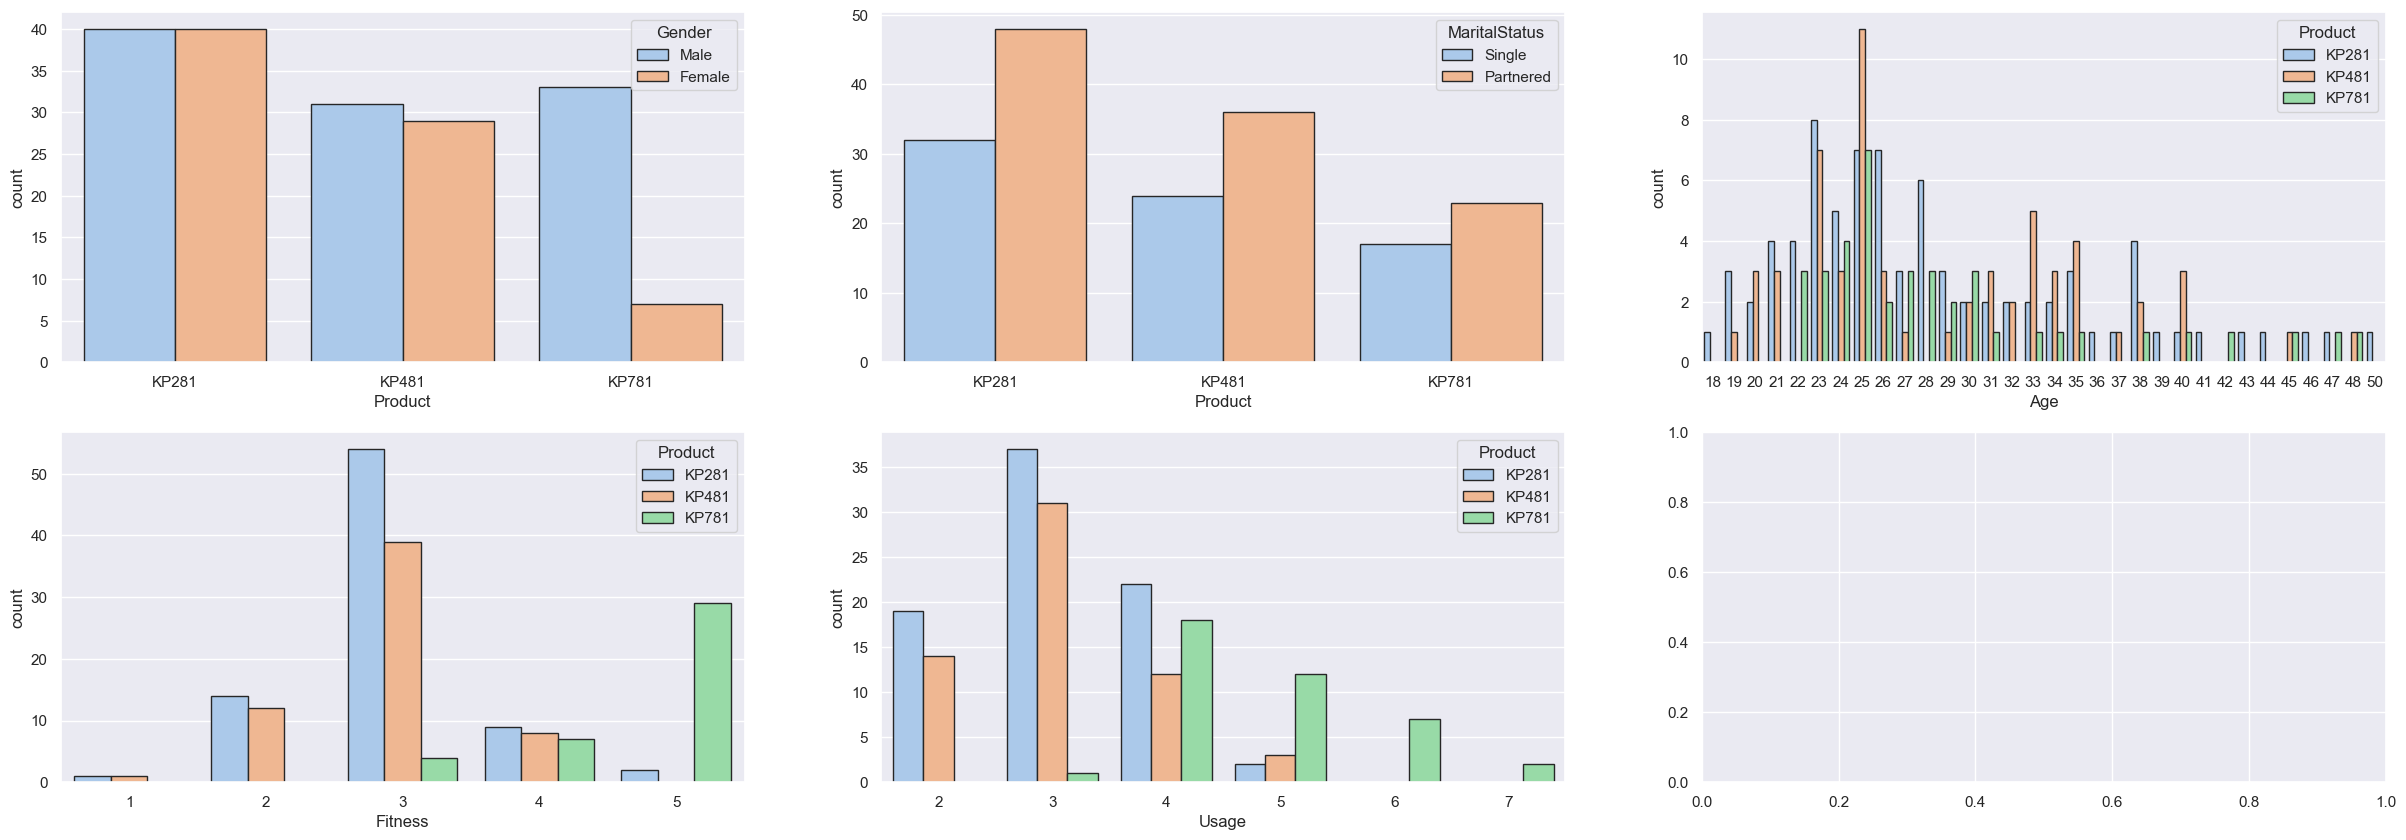

In [60]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30,10))
sns.countplot(data=df, x='Product', hue='Gender', edgecolor="0.15", ax=axs[0,0])
sns.countplot(data=df, x='Product', hue='MaritalStatus', edgecolor="0.15", ax=axs[0,1])
sns.countplot(data=df, x='Age', hue='Product', edgecolor="0.15", ax=axs[0,2])

sns.countplot(data=df, x='Fitness', hue='Product', edgecolor="0.15", ax=axs[1,0])
sns.countplot(data=df, x='Usage', hue='Product', edgecolor="0.15", ax=axs[1,1])
plt.show()

###### Plotly version

In [22]:
fig = make_subplots(rows=2, cols=3, subplot_titles=(
    "Product by Gender", "Product by Marital Status", "Age by Product",
    "Fitness by Product", "Usage by Product", ""))

# Function to create grouped bar plot
def create_grouped_bar(df, x, hue, row, col):
    grouped = df.groupby([x, hue]).size().unstack(fill_value=0)
    for category in grouped.columns:
        fig.add_trace(
            go.Bar(x=grouped.index, y=grouped[category], name=f"{hue}: {category}"),
            row=row, col=col
        )

# Product by Gender
create_grouped_bar(df, 'Product', 'Gender', 1, 1)

# Product by MaritalStatus
create_grouped_bar(df, 'Product', 'MaritalStatus', 1, 2)

# Age by Product
create_grouped_bar(df, 'Age', 'Product', 1, 3)

# Fitness by Product
create_grouped_bar(df, 'Fitness', 'Product', 2, 1)

# Usage by Product
create_grouped_bar(df, 'Usage', 'Product', 2, 2)

# Update layout
fig.update_layout(height=1000, width=3000, title_text="Product Analysis")

# Update x-axis labels
for i in fig['layout']['annotations']:
    i['font'] = dict(size=20)

# Update legend
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.02,
    xanchor="right",
    x=1
))

# Show plot
fig.show()



Obervations

    Product vs Gender
        Equal number of males and females have purchased KP281 product and Almost same for the product KP481
        Most of the Male customers have purchased the KP781 product.

    Product vs MaritalStatus
        Customer who is Partnered, is more likely to purchase the product.

    Age vs Product
        Customers with age of 25 are more likely to purchase the KP481 product.



##### Outliers

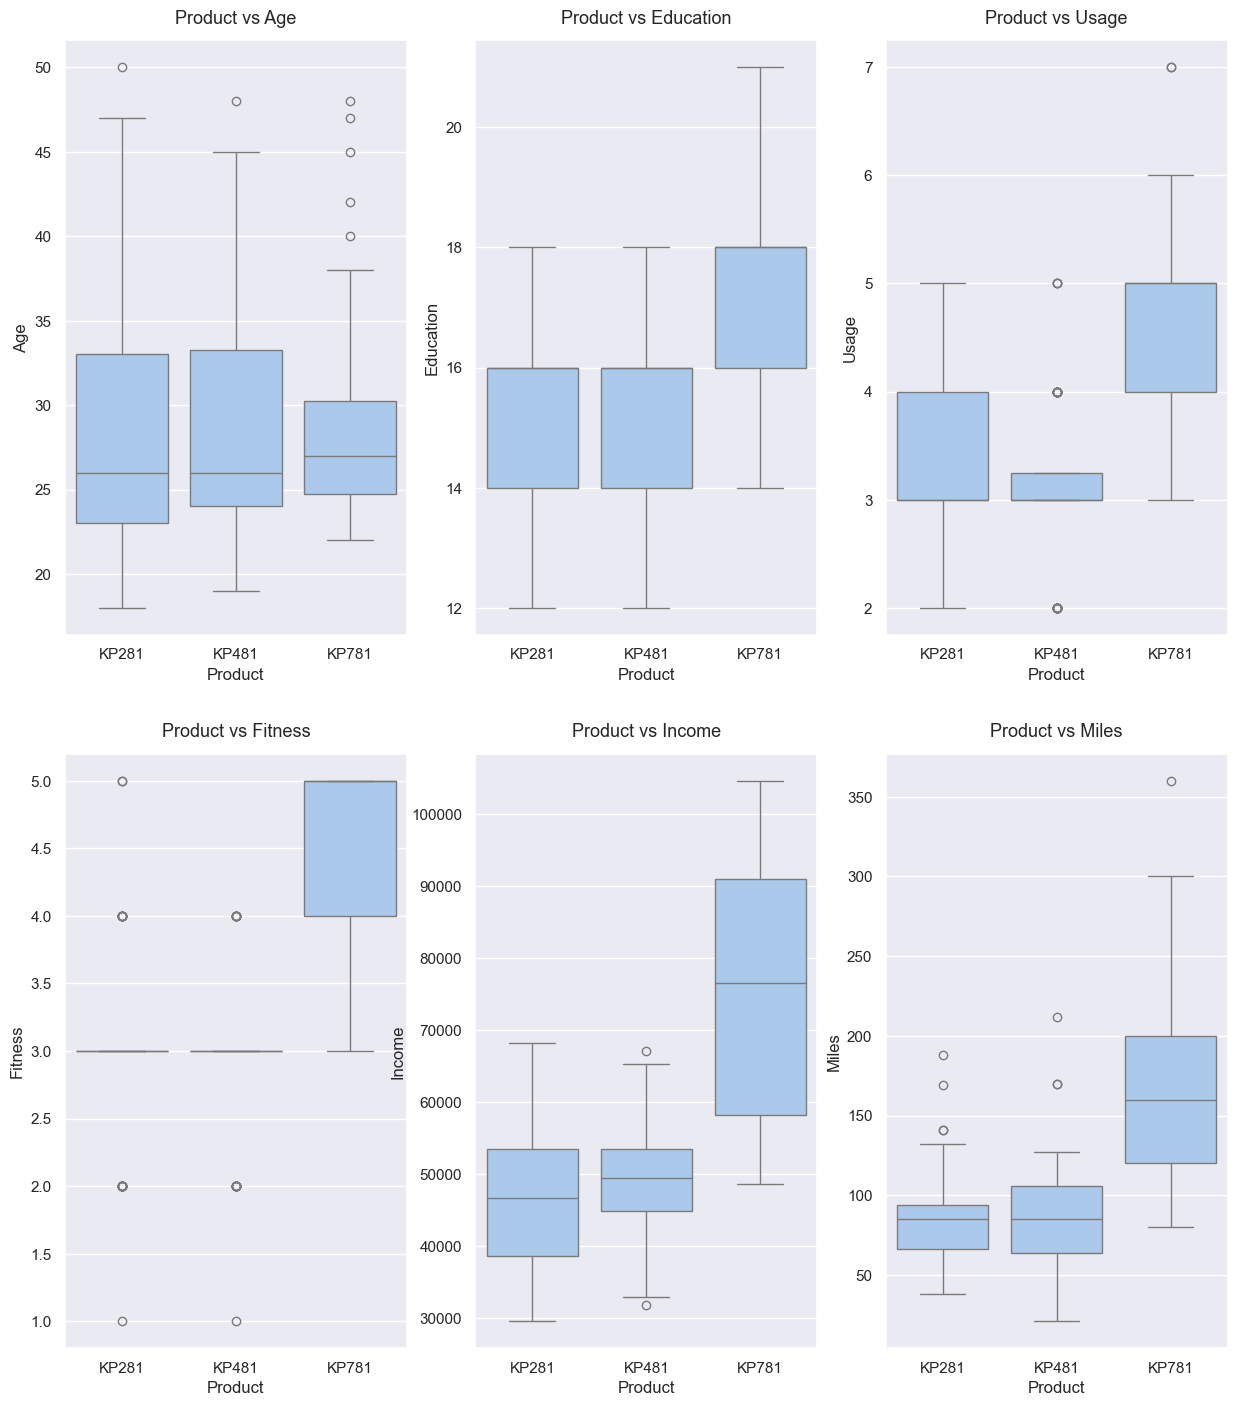

In [58]:
attributes = ['Age', 'Education', 'Usage','Fitness', 'Income', 'Miles']
# sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
  for j in range(3):
    sns.boxplot(data=df, x='Product', y=attributes[count], ax=axs[i,j])
    axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
    count += 1



Observations:

    Product vs Age
        Customers que compran KP281 & KP481 tienen la misma media de edad
        Customers que estan entre los 25-30 es mas probable que compren KP781.

    Product vs Education
        Customers con una educacion mayor a los 16, es mas que probable que compren KP78111
        Customers con una educacion menor a los 16 es mas probable que compren KP281 o KP481

    Product vs Usage
        Costomer que tengan planeado usar el treadmill mas de 4 veces por semana es mas probable que compren KP781.
        Mientras que los demas es probable que compren KP281 o KP481

    Product vs Fitness
        Si el customer es mas fit (fitnest > 3 ) mayor es la probabilidad que el cliente compre el KP781

    Product vs Income
        Si el income del customer es mayor a >= 60000 , mayor son la probabilidades que el cliente compre el KP781.

    Product vs Miles
        Si el cliente esperar correr/caminar mas de 120 Miles por semana, es mas probable que compre el KP781.

###### Plotly version

In [24]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Create subplots
fig = make_subplots(rows=2, cols=3, subplot_titles=[f"Product vs {attr}" for attr in attributes])

# Function to create boxplot
def create_boxplot(df, x, y, row, col):
    products = df[x].unique()
    for product in products:
        fig.add_trace(
            go.Box(y=df[df[x]==product][y], name=product),
            row=row, col=col
        )

# Create boxplots
count = 0
for i in range(2):
    for j in range(3):
        create_boxplot(df, 'Product', attributes[count], i+1, j+1)
        count += 1

# Update layout
fig.update_layout(height=1200, width=1500, title_text="Product Analysis - Boxplots")

# Update y-axis titles
for i in range(len(attributes)):
    fig.update_yaxes(title_text=attributes[i], row=(i//3)+1, col=(i%3)+1)

# Update x-axis titles
for i in range(6):
    fig.update_xaxes(title_text="Product", row=(i//3)+1, col=(i%3)+1)

# Update subplot titles font size
for i in fig['layout']['annotations']:
    i['font'] = dict(size=13)

# Show plot
fig.show()

##### Multivariable Analysis


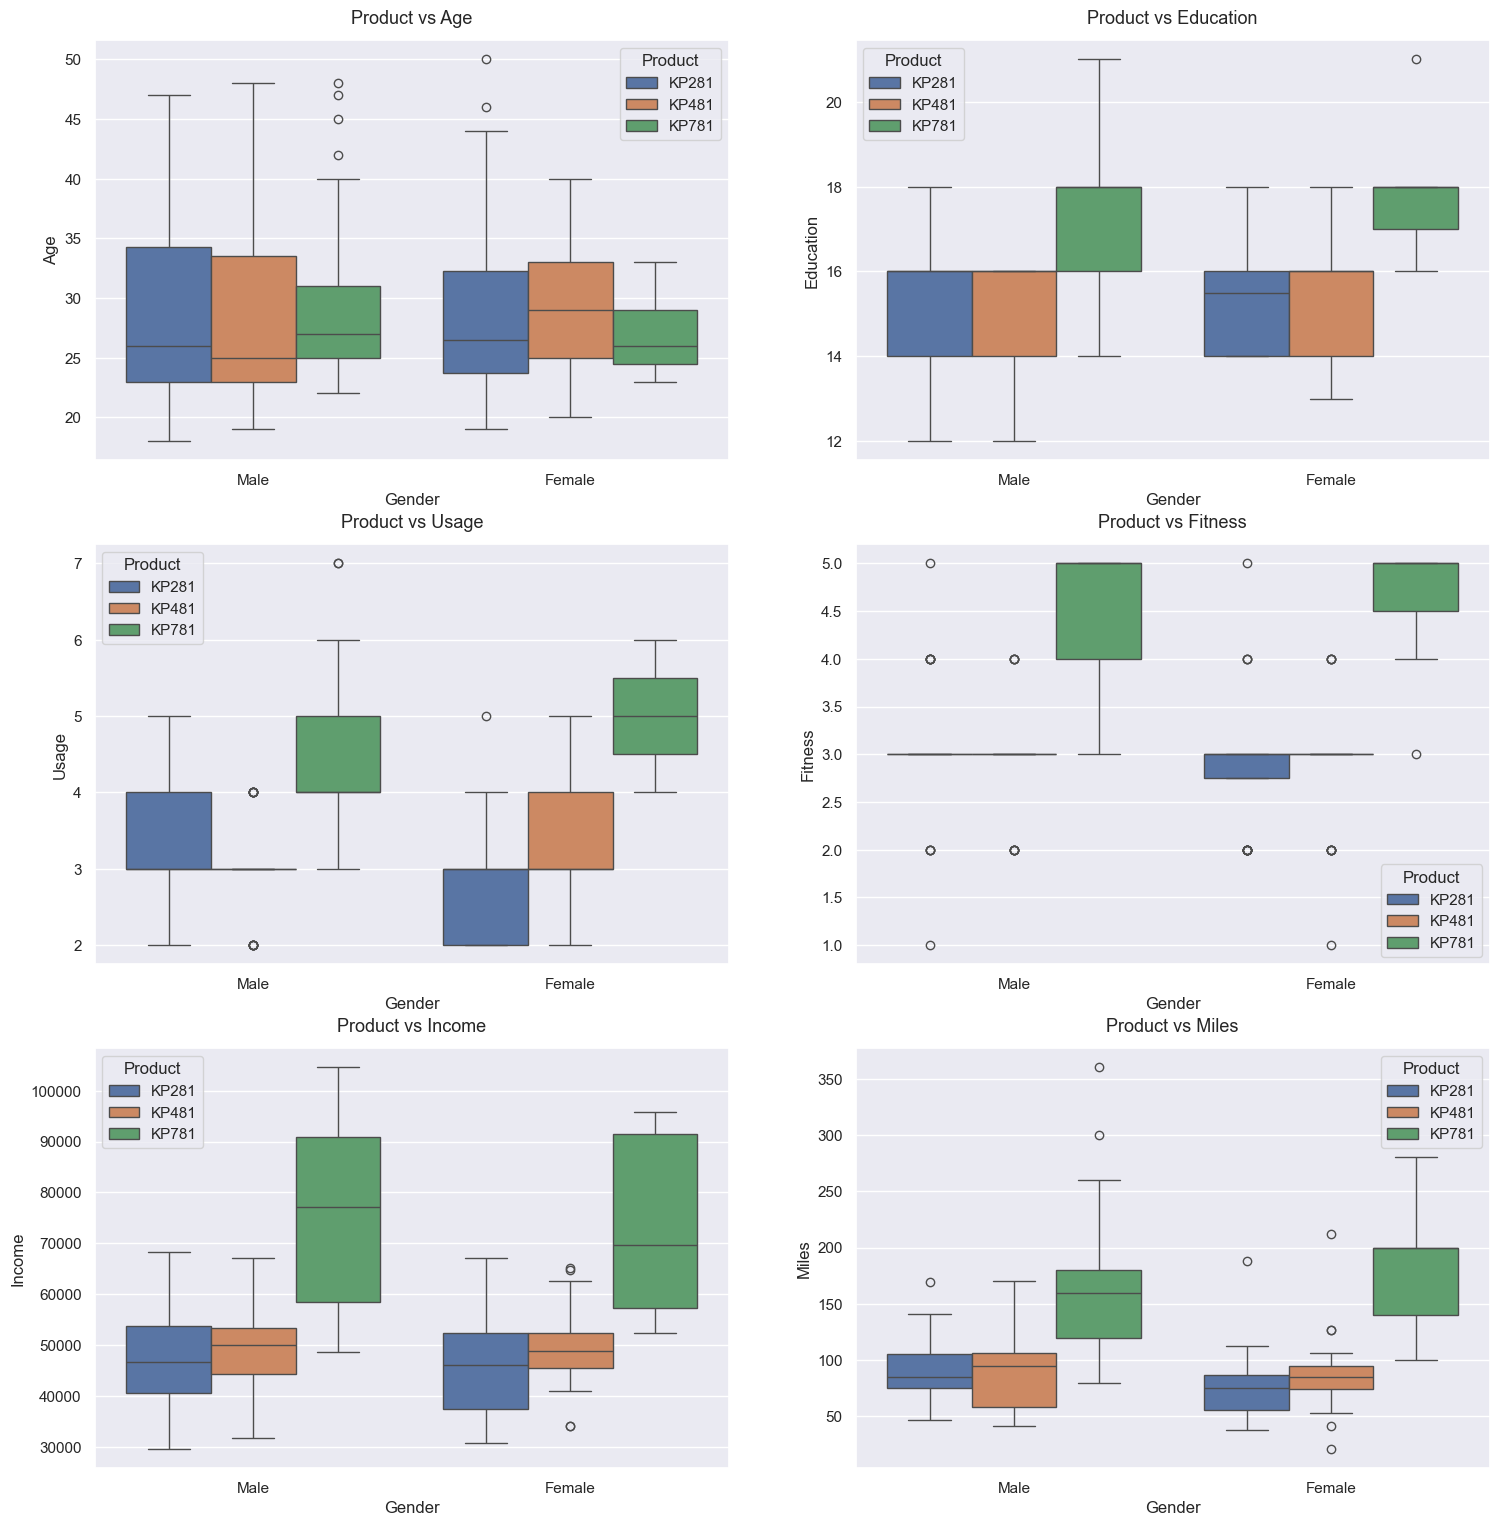

In [67]:
attributes = ['Age', 'Education', 'Usage','Fitness', 'Income', 'Miles']
# sns.set(color_codes = True)
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18,12))
fig.subplots_adjust(top=1.3)
count = 0
for i in range(3):
  for j in range(2):
    sns.boxplot(data=df, x='Gender', y=attributes[count], hue='Product', ax=axs[i,j])
    axs[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=13)
    count+= 1



Obervations

    Las mujeres que planean usar el treadmil 3-4 veces a la semana son mas probable que compren KP481

In [63]:
df_numerical = df[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']]

In [64]:
df_numerical.cov()

Age     Education        Usage      Fitness        Income  \
Age           48.212166      3.149410     0.113470     0.406828  5.884446e+04   
Education      3.149410      2.614867     0.693172     0.636623  1.670472e+04   
Usage          0.113470      0.693172     1.176785     0.695469  9.303043e+03   
Fitness        0.406828      0.636623     0.695469     0.919429  8.467925e+03   
Income     58844.463439  16704.717815  9303.042582  8467.925388  2.724706e+08   
Miles         13.186530     25.770795    42.709808    39.073246  4.652654e+05   

                   Miles  
Age            13.186530  
Education      25.770795  
Usage          42.709808  
Fitness        39.073246  
Income     465265.361887  
Miles        2689.833489

In [65]:
df_numerical.corr()

Age  Education     Usage   Fitness    Income     Miles
Age        1.000000   0.280496  0.015064  0.061105  0.513414  0.036618
Education  0.280496   1.000000  0.395155  0.410581  0.625827  0.307284
Usage      0.015064   0.395155  1.000000  0.668606  0.519537  0.759130
Fitness    0.061105   0.410581  0.668606  1.000000  0.535005  0.785702
Income     0.513414   0.625827  0.519537  0.535005  1.000000  0.543473
Miles      0.036618   0.307284  0.759130  0.785702  0.543473  1.000000

##### Correlation Analysis

<Axes: >

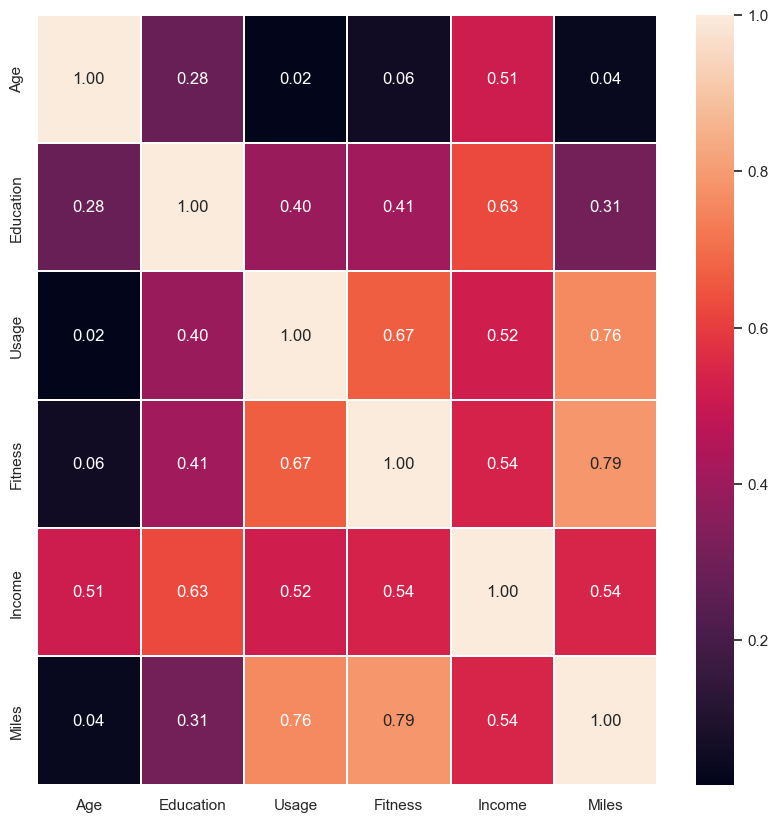

In [68]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_numerical.corr(), ax=ax, annot=True, linewidths= 0.05, fmt = "0.2f")



Observations:

    (Miles & Fitness) y (Miles & Usage) estan altamente correlacionados, lo que quiere decir si un custemer tiene un fitness alto es probable que compren un treadmils 

    Income y Education muestran una correlacion. High-income y highly educated people prefer the KP781 treadmill which is having advanced features.

    No hay correlacion entre (Usage & Age) or (Fitness & Age) attributes, Lo que significa que la edad no debe signifcar barrera para el uso especifico de un producto en especifico.



##### Pair plots

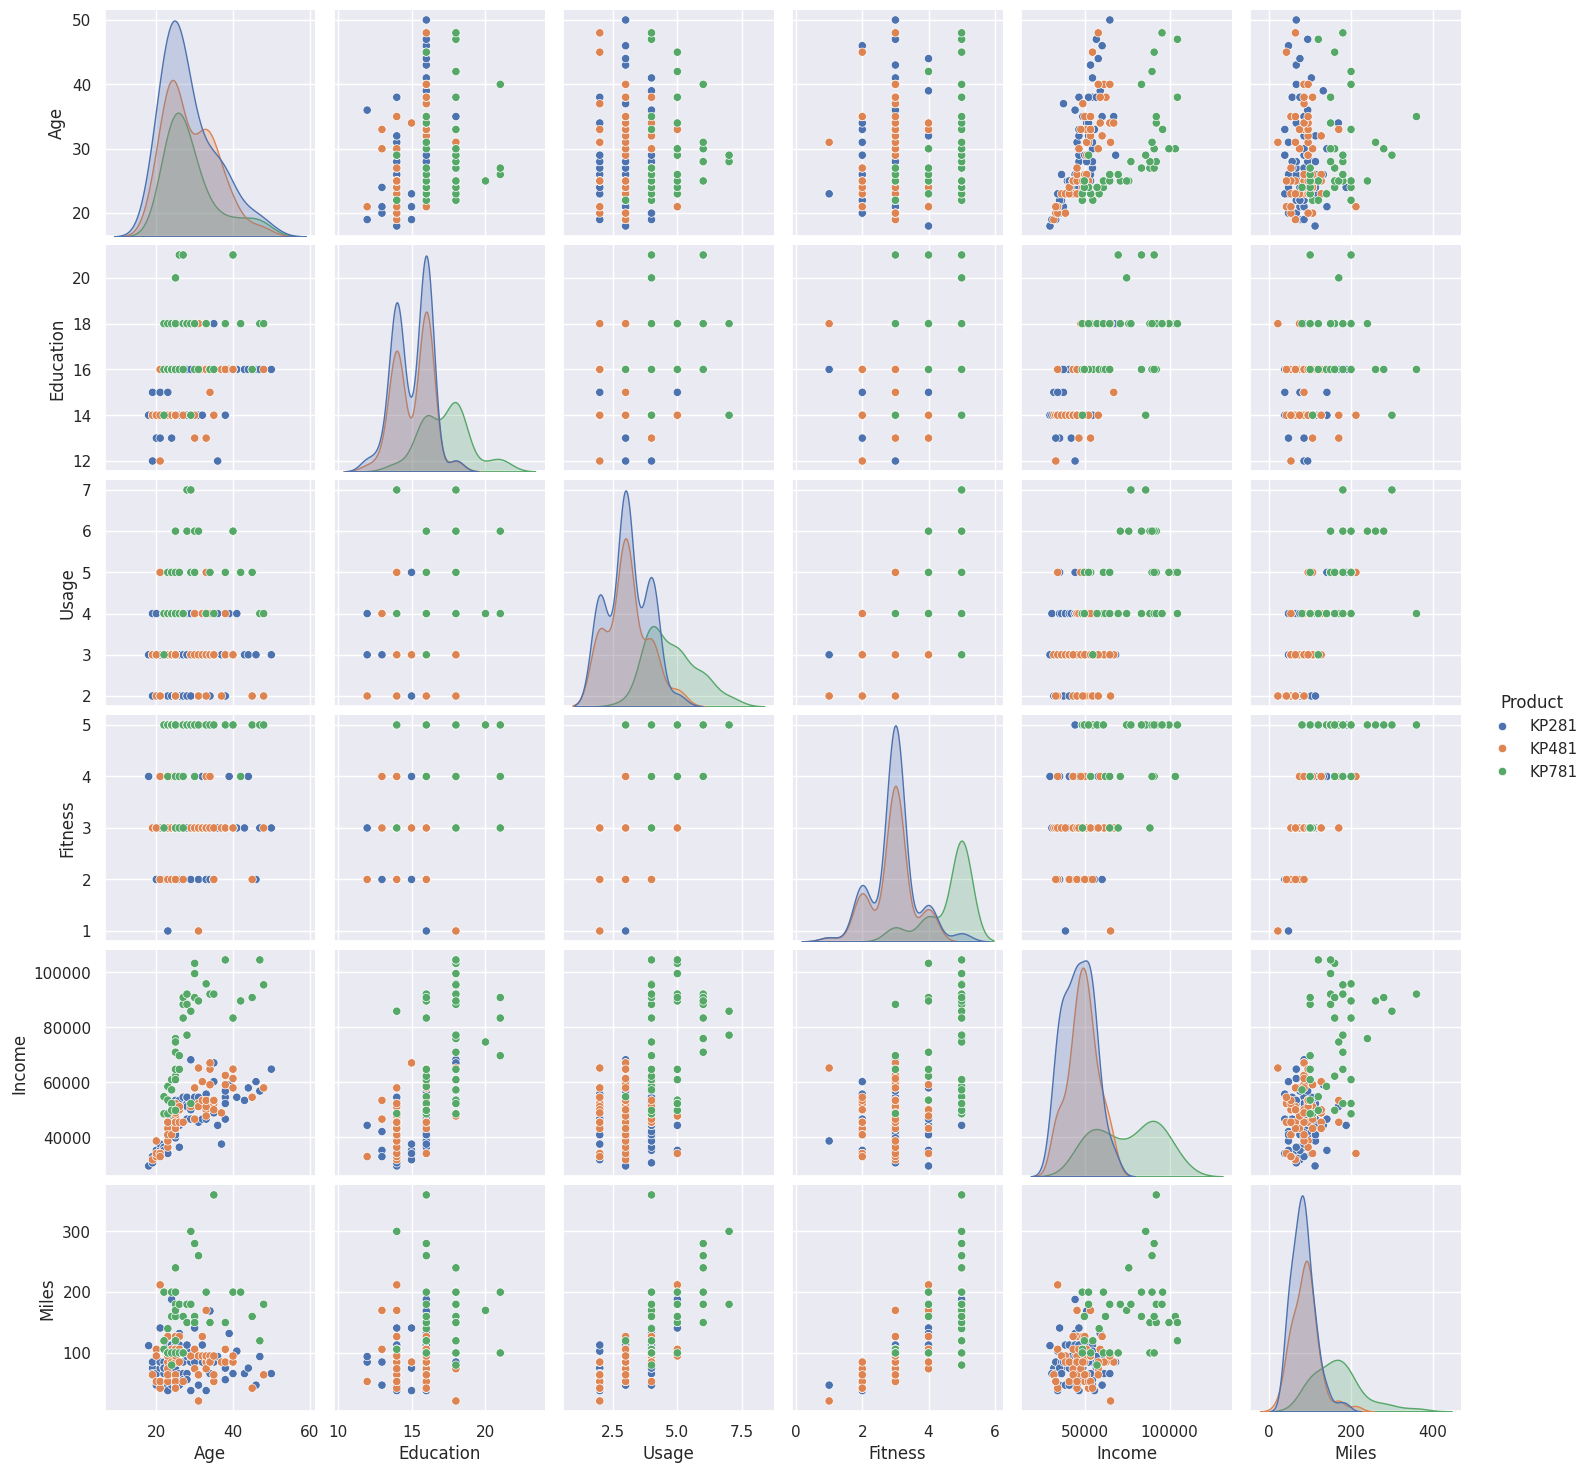

In [30]:
sns.pairplot(df, hue="Product")
plt.show()

##### Marginal & Conditional Probabilities

What percent of customers have purchased KP281, KP481, or KP781?

In [31]:
melted_df = df[['Product', 'Gender', 'MaritalStatus']].melt()

In [32]:
melted_df

variable      value
0          Product      KP281
1          Product      KP281
2          Product      KP281
3          Product      KP281
4          Product      KP281
..             ...        ...
535  MaritalStatus     Single
536  MaritalStatus     Single
537  MaritalStatus     Single
538  MaritalStatus  Partnered
539  MaritalStatus  Partnered

[540 rows x 2 columns]

In [33]:
(melted_df.groupby(['variable', 'value'])[['value']].count() / len(df)).mul(100).round(3).astype(str) + '%'

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%



Obervations

    Product
        44.44% of the customers han comprado KP281 product.
        33.33% of the customers han comprado KP481 product.
        22.22% of the customers han comprado KP781 product.

    Gender
        57.78% of the customers are Male.

    MaritalStatus
        59.44% of the customers are Partnered.



##### What is the probability of a customer based on Gender ( Male or Female ) buying a certain treadmill Product?

In [72]:
def p_prod_given_gender(gender, print_marginal=False):
  if gender is not "Female" and gender is not "Male":
    return "Invalid gender value."

  df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
  p_281 =  df1['KP281'][gender] / df1.loc[gender].sum()
  p_481 =  df1['KP481'][gender] / df1.loc[gender].sum()
  p_781 =  df1['KP781'][gender] / df1.loc[gender].sum()

  if print_marginal:    
    print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
    print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
  
  print(f"P(KP281/{gender}): {p_281:.2f}") 
  print(f"P(KP481/{gender}): {p_481:.2f}")
  print(f"P(KP781/{gender}): {p_781:.2f}\n")


In [76]:
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')


P(Male): 0.58
P(Female): 0.42

P(KP281/Male): 0.38
P(KP481/Male): 0.30
P(KP781/Male): 0.32

P(KP281/Female): 0.53
P(KP481/Female): 0.38
P(KP781/Female): 0.09



In [80]:
df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])

In [81]:
df1

Product  KP281  KP481  KP781
Gender                      
Female      40     29      7
Male        40     31     33

##### What is the probability of a customer based on MaritalStatus ( Single or Partnered ) buying a certain treadmill Product?

In [82]:
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

104

In [ ]:
def p_prod_given_mstatus(status, print_marginal=False):
  if status is not "Single" and status is not "Parnered":
    return "Invalid status value."

  df1 = pd.crosstab(index=df['Gender'], columns=[df['Product']])
  p_281 =  df1['KP281'][status] / df1.loc[status].sum()
  p_481 =  df1['KP481'][status] / df1.loc[status].sum()
  p_781 =  df1['KP781'][status] / df1.loc[status].sum()

  if print_marginal:    
    print(f"P(Male): {df1.loc['Male'].sum()/len(df):.2f}")
    print(f"P(Female): {df1.loc['Female'].sum()/len(df):.2f}\n")
  
  print(f"P(KP281/{status}): {p_281:.2f}") 
  print(f"P(KP481/{status}): {p_481:.2f}")
  print(f"P(KP781/{status}): {p_781:.2f}\n")